# Hackaton Ciencias de Redes
## Grupo 5
- #### Patricio Ramirez
- #### Carlos Bustamante
- #### Victor Ortiz
- #### Pablo Elgueta

## Tarea

#### Objetivo General: 
    Determinar patrones potenciales de corrupción en compras públicas en Chile. Para esto, se disponibilizarán los datos de todos las licitaciones públicas en Chile entre 2014 y 2021. Deben elegir un periodo a estudiar y que los datos son pesados.
    
#### 1) Análisis Exploratorio: 
    Puede incluir histogramas, relaciones bivariadas, correlaciones (coeficientes y figuras), etc.
#### 2) Inferencia red: 
    Red bipartita, proyección unimodal de la red bipartita, modelos nulos para filtrar (phi correlation, randomización preservando grado, etc)
#### 3) Descripción de la red: 
    Distribución de grados (antes y despues de filtrar), gráfico grado de nodo vs coeficiente de clustering, diámetro de la red, número de nodos, número de enlaces, densidad. Detección de comunidades, etc.
#### 4) Identifiación de patrones de corrupción en la red: 
    El trabajo es abierto en términos de identificación de patrones, sin embargo, pueden usar lo siguiente:
- 1) Índice de diversidad de simpson por comunidad (ver referencia 1)
- 2) índice de entropía del buyer (oferente) (ver referncia 2)
- 3) Licitaciones con solo 1 bider (ofertante) (ver referencia 1 y 2) [esto es uno de los indicadores de potencial
riesgo de corrupción, ver CRI referencia 2 y 3]
- 4) Coefcieinte de clustering competitivo (si trabajan con la red bipartita sin proyectar) (ver referencia 2)
- 5) Datos externos si encuentan y alcanzan son bienvenidos.
- 6) Otros.

### Importación de Librerías

In [1]:
import pandas as pd
import numpy as np

import networkx as nx
from networkx.algorithms import bipartite

# Desarrollo de Proyecto

## Objetivos e Hipotesis

- ¿Existe una relación que se repita de forma sostenida entre Organismos Públicos y Privados, con los Proveedores para el periodo a analizar?(2020).
- Desarrollo de una red bipartita para nuestro análisis.
- Trabajar en base al componente gigante de la red.
- Identificar patrones de corrupción en la red.

### 1) Análisis Exploratorio: 

In [2]:
df = pd.read_csv('lic2020_hackaton.csv', sep=',', encoding='latin_1')

In [3]:
df.head(3)

,Codigo,Tipo de Adquisicion,Estado,CodigoOrganismo,NombreOrganismo,RutUnidad,ComunaUnidad,FechaPublicacion,CodigoProductoONU,RutProveedor,NombreProveedor,Moneda de la Oferta,MontoLineaAdjudica,Oferta seleccionada
0,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,76.432.529-K,CSL Behring SpA Chile,Peso Chileno,0,No Seleccionada
1,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,96.945.670-2,NOVOFARMA SERVICE - LABORATORIO BAGO,Peso Chileno,0,No Seleccionada
2,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,96.582.310-7,Grifols Chile S.A.,Peso Chileno,1592000,Seleccionada


In [4]:
df.isnull().sum()

Codigo                      0
Tipo de Adquisicion         0
Estado                      0
CodigoOrganismo             0
NombreOrganismo             0
RutUnidad                   0
ComunaUnidad           111298
FechaPublicacion            0
CodigoProductoONU           0
RutProveedor                0
NombreProveedor          1860
Moneda de la Oferta         0
MontoLineaAdjudica          0
Oferta seleccionada         0
dtype: int64

In [5]:
df[df['NombreProveedor'].isnull()].head(3)

,Codigo,Tipo de Adquisicion,Estado,CodigoOrganismo,NombreOrganismo,RutUnidad,ComunaUnidad,FechaPublicacion,CodigoProductoONU,RutProveedor,NombreProveedor,Moneda de la Oferta,MontoLineaAdjudica,Oferta seleccionada
4068,8621395,Licitación Pública Menor a 100 UTM (L1),Adjudicada,99860,MUNICIPALIDAD DE OVALLE,69.040.700-0,Ovalle,2020-01-13,25172301,76.690.208-1,NaN,Peso Chileno,1200000,Seleccionada
4190,8621461,Licitación Pública Menor a 100 UTM (L1),Adjudicada,99860,MUNICIPALIDAD DE OVALLE,69.040.700-0,Ovalle,2020-01-13,25172901,76.690.208-1,NaN,Peso Chileno,0,No Seleccionada
4192,8621461,Licitación Pública Menor a 100 UTM (L1),Adjudicada,99860,MUNICIPALIDAD DE OVALLE,69.040.700-0,Ovalle,2020-01-13,15121501,76.690.208-1,NaN,Peso Chileno,0,No Seleccionada


In [6]:
df = df.dropna()

,Codigo,Tipo de Adquisicion,Estado,CodigoOrganismo,NombreOrganismo,RutUnidad,ComunaUnidad,FechaPublicacion,CodigoProductoONU,RutProveedor,NombreProveedor,Moneda de la Oferta,MontoLineaAdjudica,Oferta seleccionada
7,8492315,Licitación Pública Entre 100 y 1000 UTM (LE),Adjudicada,7451,SERVICIO DE SALUD ANTOFAGASTA HOSPITAL L,61.606.201-8,Antofagasta,2020-01-10,41116004,96.659.920-0,bioMérieux Chile SpA,Peso Chileno,8750000,Seleccionada
8,8492315,Licitación Pública Entre 100 y 1000 UTM (LE),Adjudicada,7451,SERVICIO DE SALUD ANTOFAGASTA HOSPITAL L,61.606.201-8,Antofagasta,2020-01-10,41116004,96.659.920-0,bioMérieux Chile SpA,Peso Chileno,0,No Seleccionada
9,8492315,Licitación Pública Entre 100 y 1000 UTM (LE),Adjudicada,7451,SERVICIO DE SALUD ANTOFAGASTA HOSPITAL L,61.606.201-8,Antofagasta,2020-01-10,41116004,59.051.480-2,Becton Dickinson de Chile,Peso Chileno,0,No Seleccionada
10,8492315,Licitación Pública Entre 100 y 1000 UTM (LE),Adjudicada,7451,SERVICIO DE SALUD ANTOFAGASTA HOSPITAL L,61.606.201-8,Antofagasta,2020-01-10,41116004,79.568.850-1,VALTEK S.A.,Peso Chileno,0,No Seleccionada
11,8492315,Licitación Pública Entre 100 y 1000 UTM (LE),Adjudicada,7451,SERVICIO DE SALUD ANTOFAGASTA HOSPITAL L,61.606.201-8,Antofagasta,2020-01-10,41116004,76.131.142-5,QuoRux Chile SPA,Peso Chileno,1584000,Seleccionada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882975,8886484,Licitación Pública Mayor a 5000 (LR),Adjudicada,117406,I MUNICIPALIDAD DE PADRE HURTADO,69.261.400-3,Padre Hurtado,2020-09-07,72131702,76.182.118-0,ASIGMU S.A.,Peso Chileno,297791027,Seleccionada
1882976,8886484,Licitación Pública Mayor a 5000 (LR),Adjudicada,117406,I MUNICIPALIDAD DE PADRE HURTADO,69.261.400-3,Padre Hurtado,2020-09-07,72131702,76.540.655-2,OyC Servicios Generales SpA,Peso Chileno,0,No Seleccionada
1882977,8886484,Licitación Pública Mayor a 5000 (LR),Adjudicada,117406,I MUNICIPALIDAD DE PADRE HURTADO,69.261.400-3,Padre Hurtado,2020-09-07,72131702,76.395.654-7,RMC Ltda.,Peso Chileno,0,No Seleccionada
1882978,8886484,Licitación Pública Mayor a 5000 (LR),Adjudicada,117406,I MUNICIPALIDAD DE PADRE HURTADO,69.261.400-3,Padre Hurtado,2020-09-07,72131702,77.057.443-9,mauricio,Peso Chileno,305723451,Seleccionada


In [7]:
df.isnull().sum()

Codigo                 0
Tipo de Adquisicion    0
Estado                 0
CodigoOrganismo        0
NombreOrganismo        0
RutUnidad              0
ComunaUnidad           0
FechaPublicacion       0
CodigoProductoONU      0
RutProveedor           0
NombreProveedor        0
Moneda de la Oferta    0
MontoLineaAdjudica     0
Oferta seleccionada    0
dtype: int64

In [8]:
print('Cantidad de Nombres de Organismo:')
print(len(df['NombreOrganismo'].unique()))
print('\nCantidad de Codigos de Organismo:')
print(len(df['CodigoOrganismo'].unique()))

Cantidad de Nombres de Organismo:
859

Cantidad de Codigos de Organismo:
871


- ###### Del análisis de datos, fué posible identificar que existen 2 grupos de nodos mediante los cuales es posible generar una Red Bipartita. El primer Grupo contempla las primeras columnas de datos que se encuentras asociadas a los Organismos estatales que generan las Licitaciones. Por otro lado, el conjunto de columnas de la izquierda corresponden a las Empresas participantes de las licitaciones.

- ###### Dentro del análisis exploratiorio de los datos, fue posible identificar que las cantidades de CodigosOrganismos no coincidía con la de NombreOrganismos, lo cual eventualmente significaría que existen Organismos con más de un código asociado, lo que nos inclina por trabajar con los Nombres.

- ###### Otra observación que pudimos identificar, es que algunas de las empresas que participan como oferentes, se en cuentran también dentro del listado de Organismos, estas corresponden a aquellas empresas estatales como universidades, las cuales poseen áreas de proyectos o investigación para el autofinanciamiento.

### 2) Inferencia red:

#### Lista de Nodos de Organismos

In [9]:
lista_organismos = df['NombreOrganismo'].unique()
lista_organismos[0:5]
len(lista_organismos)

859

#### Lista de Nodos de Empresas

In [10]:
lista_empresas = df['NombreProveedor'].unique()
lista_empresas[0:5]
len(lista_empresas)

37765

#### Eliminar Nodos Presentes en Ambos Grupos de Nodos

In [11]:
del_empresas = []
for organismo in lista_organismos:
    for empresa in lista_empresas:
        if organismo == empresa:
            del_empresas.append(organismo)
del_empresas

['UNIVERSIDAD DE MAGALLANES',
 'UNIVERSIDAD DEL BIO BIO',
 'UNIVERSIDAD DE ATACAMA',
 'UNIVERSIDAD DE TALCA',
 'UNIVERSIDAD DE LA FRONTERA',
 'INSTITUTO FORESTAL',
 'INSTITUTO DE FOMENTO PESQUERO']

In [12]:
for universidad in del_empresas:
    df = df[df['NombreProveedor'] != universidad]

In [13]:
lista_empresas = df['NombreProveedor'].unique()
len(lista_empresas)

37758

#### Definición de Enlaces Empresas/Organismos

In [16]:
pivot = pd.pivot_table(df, index=['NombreOrganismo','NombreProveedor'],values=['Oferta seleccionada'],aggfunc='count')
pivot = pivot.reset_index()
pivot.head()

,NombreOrganismo,NombreProveedor,Oferta seleccionada
0,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,ARTL CHILE AUDITORES SPA,1
1,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,AdjudicaChile Consultora en Licitaciones Públicas,1
2,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,Aiguasol,2
3,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,Amelia Virginia,1
4,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,Astral S.A.,1


In [17]:
lista_tuplas_pesos = []

for i in pivot.to_numpy():
    lista_tuplas_pesos.append((i[0], i[1], i[2]))
lista_tuplas_pesos[:4]

In [19]:
len(lista_tuplas_pesos)

205391

#### Construcción del Grafo

In [20]:
G = nx.Graph()
G.add_nodes_from(lista_empresas, bipartite=0)
G.add_nodes_from(lista_organismos,bipartite=1)
G.add_weighted_edges_from(lista_tuplas_pesos)
bipartite.is_bipartite(G)

In [24]:
nx.density(G)

0.00027546446779416127

#### Identificacion de Comunidades

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [26]:
from community import community_louvain

partition = community_louvain.best_partition(G)

size = (len(set(partition.values())))#Numero de comunidades
print('Se detectan %d comunidades' % (size))

Se detectan 16 comunidades


In [27]:
d = {}
for character, par in partition.items():
    if par in d:
        d[par].append(character)
    else:
        d[par] = [character]


In [28]:
for i in range(len(d)):
    print(f'Tamaño Comunidad {i}: {len(d[i])}')

Tamaño Comunidad 0: 3357
Tamaño Comunidad 1: 1585
Tamaño Comunidad 2: 55
Tamaño Comunidad 3: 7230
Tamaño Comunidad 4: 362
Tamaño Comunidad 5: 3975
Tamaño Comunidad 6: 3193
Tamaño Comunidad 7: 594
Tamaño Comunidad 8: 71
Tamaño Comunidad 9: 4715
Tamaño Comunidad 10: 5113
Tamaño Comunidad 11: 8225
Tamaño Comunidad 12: 15
Tamaño Comunidad 13: 118
Tamaño Comunidad 14: 4
Tamaño Comunidad 15: 5


In [29]:
pos = nx.spring_layout(G) # Layout para la red (coordenadas de los nodos y enlaces)

In [30]:
#Posiciones definidas para los nodos
len(pos)

38617

In [31]:
#Verificacion de cantidad de nodos
len(lista_organismos)+len(lista_empresas)

38617

In [33]:
#Corroborar que la suma de cada nodo separado en als comunidades coincidan con la cantidad de nodos

sum = int()
for i in range(len(d)):
    sum = sum + len(d[i])
print (sum)

38617


#### Ploteo del Grafo

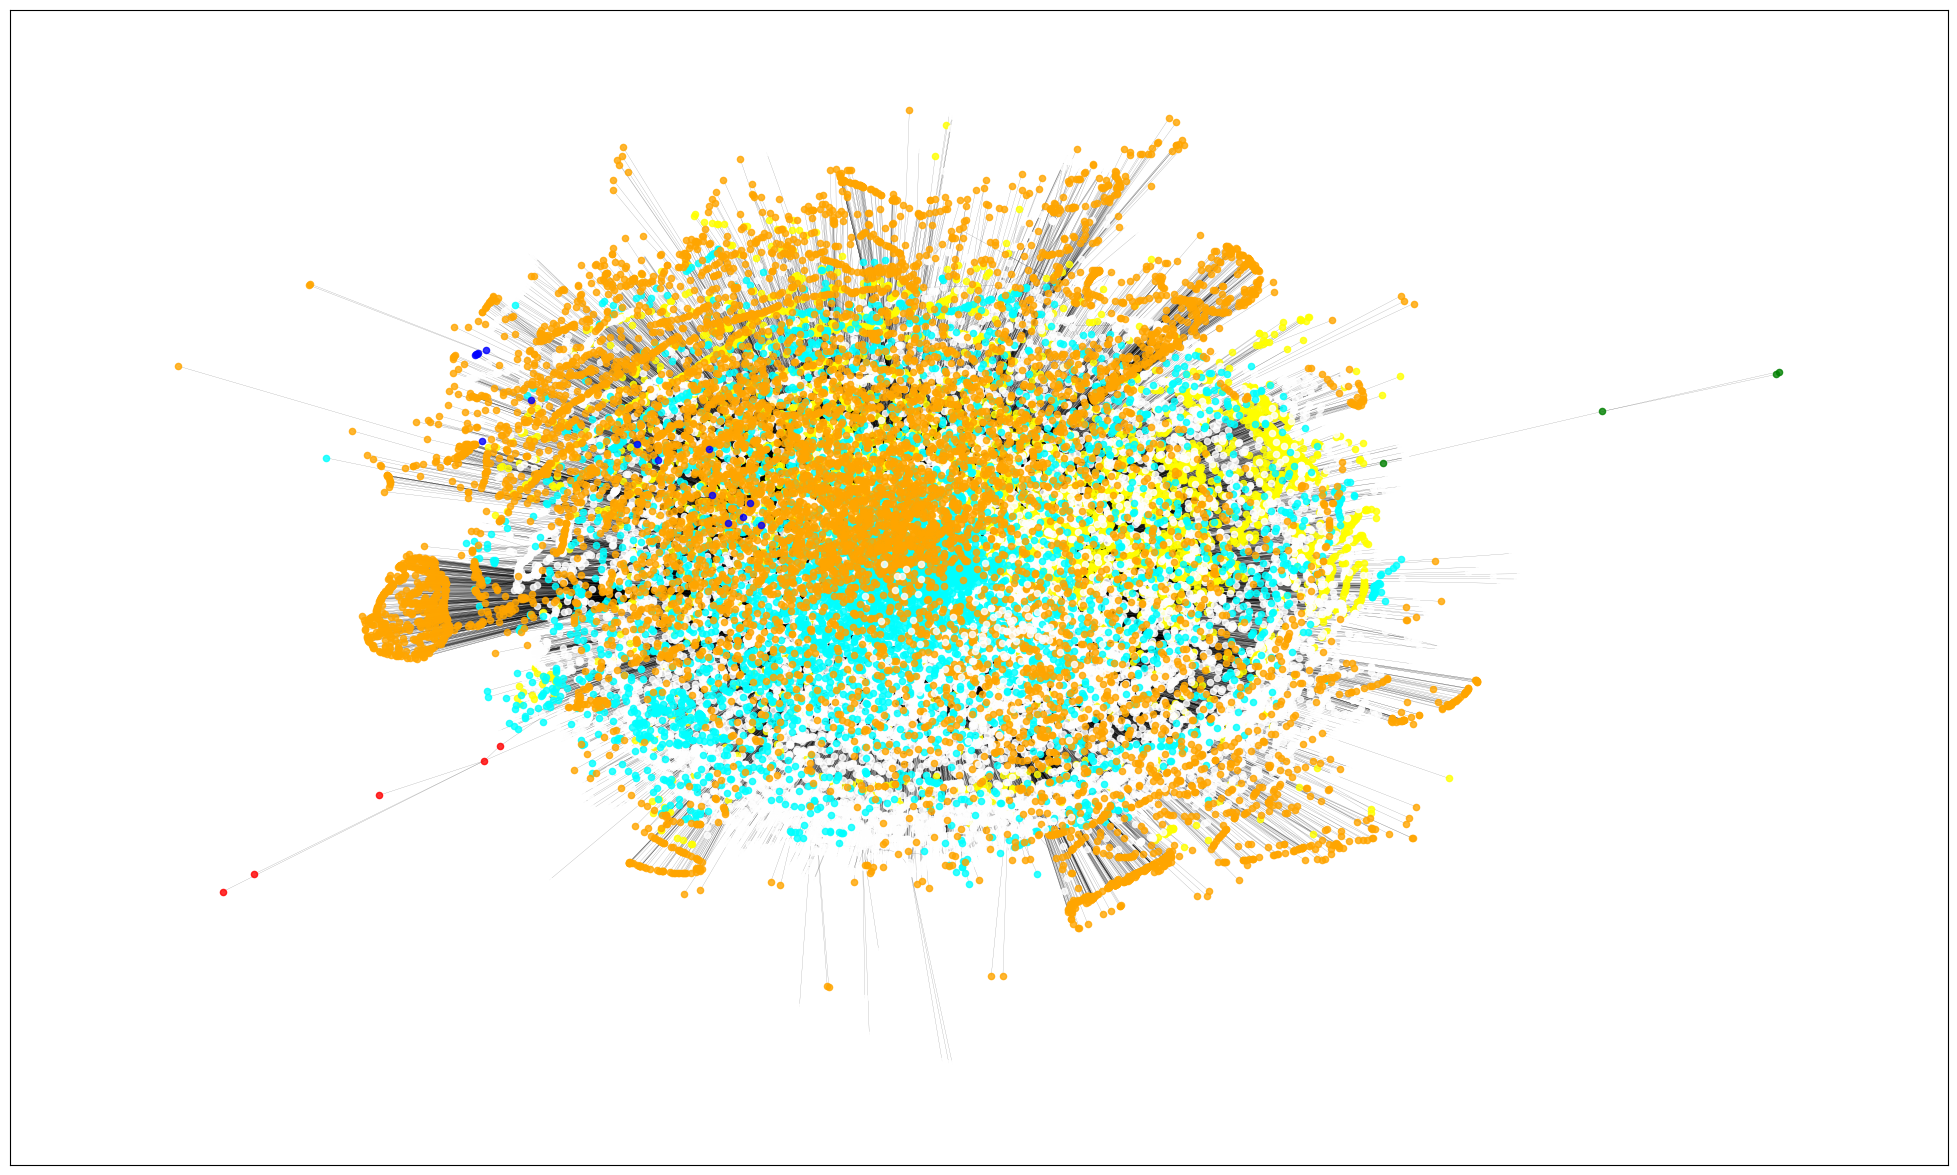

In [95]:
plt.figure(figsize=(25, 15))

#colors = [np.array(cm.jet(x)).reshape(1,-1) for x in np.linspace(0, 1, size)]#cm.jet es el mapa de colores https://www.programcreek.com/python/example/56498/matplotlib.cm.jet
colors = ['white', 'white', 'white', 'yellow', 'white', 'white', 'white', 'white', 'white', 'white', 'cyan', 'orange', 'blue', 'white', 'green', 'red', ]

count = 0
for com in set(partition.values()): #para cada comunidad
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]#guarda los personajes que pertenecen a la comunidad `com`
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color=colors[count], alpha=0.8)#plotea nodos con colors por comunidad
    count = count + 1# para iterar sobre los colores

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.15)#plotea enlaces
plt.show()


In [189]:
def comunidad(book, d):

    j=0
    df1 = pd.DataFrame()
    for name in d:
        for i in range(len(book)):
            if name in book.NombreOrganismo[i]:
                for nameT in d:
                    if nameT in book.NombreProveedor[i]:
                        if j == 0:
                            df1 = book.loc[i:i]
                            j = 1
                        else:
                            df2 = book.loc[i:i]
                            frames = [df1,df2]
                            df1 = pd.concat(frames)
                            
    dd_lista_tuplas_pesos = []
    for i in df1.to_numpy():
        dd_lista_tuplas_pesos.append((i[0], i[1], i[2]))
    dd_lista_tuplas_pesos[:4]

    G = nx.Graph()
    G.add_nodes_from(df1['NombreProveedor'].unique(), bipartite=0)
    G.add_nodes_from(df1['NombreOrganismo'].unique(),bipartite=1)
    G.add_weighted_edges_from(dd_lista_tuplas_pesos)
    
    plt.figure(figsize=(10, 6))

    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, d, node_size = 20, node_color=colors[count], alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.8, width=0.25)

    plt.show()
            
    return df1, G 

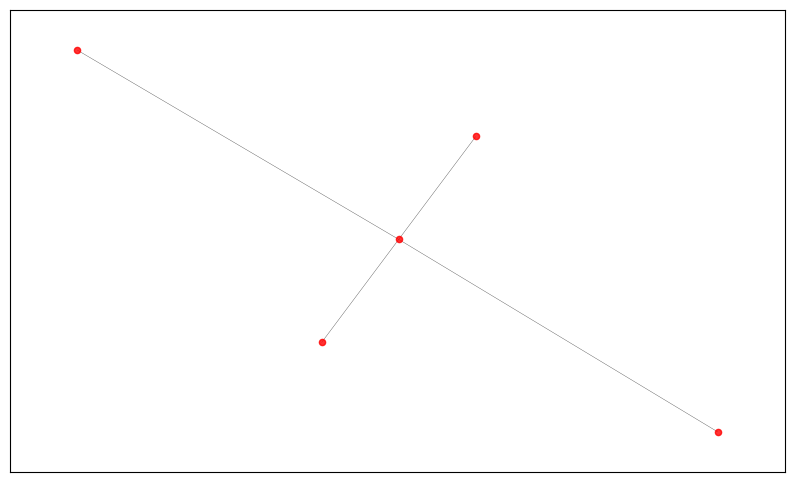

,NombreOrganismo,NombreProveedor,Oferta seleccionada
26323,GOBIERNO REGIONAL DE ATACAMA,Aquapress Limitada,1
26324,GOBIERNO REGIONAL DE ATACAMA,Conecta Global Ltda.,11
26325,GOBIERNO REGIONAL DE ATACAMA,GYP TECNOLOGIA,11
26327,GOBIERNO REGIONAL DE ATACAMA,Zerega Y Cia. Ltda.,1


In [190]:
dd, Gd = comunidad(pivot, d[15])
dd

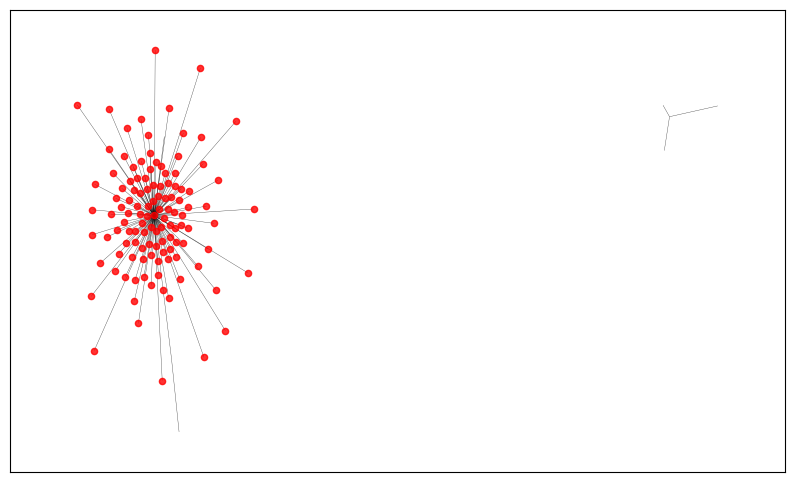

,NombreOrganismo,NombreProveedor,Oferta seleccionada
5966,COMPLEJO ASISTENCIAL DR.VICTOR RIOS RUIZ,HECTOR ALEJNADRO,4
6205,COMPLEJO ASISTENCIAL DR.VICTOR RIOS RUIZ,Yohana,10
203452,UNIVERSIDAD DE SANTIAGO DE CHILE,Arriagada y Arriagada Asociado - Casa Matriz,16
203665,UNIVERSIDAD DE SANTIAGO DE CHILE,Mauricio Edgardo,2
203781,UNIVERSIDAD DE SANTIAGO DE CHILE,construcciones ricardo bravogonzalez,1
...,...,...,...
63403,I MUNICIPALIDAD DE LAGO RANCO,manuel,11
63404,I MUNICIPALIDAD DE LAGO RANCO,mavec,3
63407,I MUNICIPALIDAD DE LAGO RANCO,ricardo,1
63409,I MUNICIPALIDAD DE LAGO RANCO,seguridad machmar spa,1


In [194]:
dd, Gd = comunidad(pivot, d[13])
dd

In [174]:
def comunidad_grado_cent_mayor (book, d):

    comunity = comunidad(book, d)
    G_comunity = nx.Graph()
    
    for row in comunity.iterrows():
        G_comunity.add_edge(row[1]['NombreOrganismo'], row[1]['NombreProveedor'], weight=row[1]['Oferta seleccionada'])
    data = nx.degree_centrality(G_comunity)
    MG = pd.DataFrame.from_dict(data, orient='index', columns= ['Degree_Centrality']).sort_values('Degree_Centrality',ascending=False).iloc[:1]
    
    return MG

In [91]:
for i in range (0,16):
    print(f'\n\nComunidad {i}')
    print(comunidad_grado_cent_mayor (pivot, d[i]))



Comunidad 0
                                          Degree_Centrality
SERVICIO DE SALUD VALDIVIA HOSPITAL BASE           0.130739


Comunidad 1
                                Degree_Centrality
SUBSECRETARIA DE SALUD PUBLICA           0.217087


Comunidad 2
                              Degree_Centrality
I MUNICIPALIDAD DE HUALAIHUE           0.388889


Comunidad 3
                              Degree_Centrality
COMANDO DE APOYO A LA FUERZA           0.087784


Comunidad 4
                                     Degree_Centrality
ILUSTRE MUNICIPALIDAD DE SAN CARLOS           0.426667


Comunidad 5
                           Degree_Centrality
I MUNICIPALIDAD DE CURICO           0.074506


Comunidad 6
                           Degree_Centrality
I MUNICIPALIDAD DE TEMUCO           0.142744


Comunidad 7
                        Degree_Centrality
CORP NACIONAL FORESTAL           0.583201


Comunidad 8
                            Degree_Centrality
I MUNICIPALIDAD DE CHEPICA                

KeyboardInterrupt: 